# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 5
### Consigna:
a) Sea k0={N/4,N/4+0.025,N/4+0.5}. Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δf. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?

Bonus:

💎 Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar Δf de forma ficticia. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

In [30]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 21 15:52:46 2021

@author: Ema
Bilbio para la res de esta tarea Holton pag 888
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.stats as stats
import matplotlib.patches as mpatches
from scipy.fft import *


In [31]:
#%% Set-UP
plt.close("all")
N = 1000 # muestras
fs= 1000 #Hz

ts = 1/fs # tiempo de muestreo

t=np.arange(0,1,ts)

K0=N/4
K1=N/4+0.025
K2=N/4+0.5

In [32]:
#%% Config de mi seno y vector de frecuencia
#senoidal de amplitud 1
amp=1 #amplitud en volts
freq0=K0*fs/N #frecuencia en Hz

fase=0 #radianes
df=fs/N
f=np.arange(0,fs,df)
bfrec = f <= fs/2
seno_cont0 = amp*np.sin(2 * np.pi * freq0 * t + fase)

In [33]:
#%%Config del seno 2
freq1=K1*fs/N #frecuencia en Hz
seno_cont1 = np.sqrt(amp)*np.sin(2 * np.pi * freq1 * t + fase)

In [34]:
#%%Config del seno 3
freq2=K2*fs/N #frecuencia en Hz
seno_cont2 = amp*np.sin(2 * np.pi * freq2 * t + fase)

In [35]:
#%% Energia de mi señal
#Este es el valor de la energia en el tiempo, se debe repetir en frecuencia
#por Parseval asique lo puedo usar para normalizar o comparar que este todo bien
#No olvidar el tema de la cantidad de muestras
E0=sum(np.abs(seno_cont0)**2)
print("Energia del seno cont0=",E0)
E1=sum(np.abs(seno_cont1)**2)
print("Energia del seno cont1=",E1)
E2=sum(np.abs(seno_cont2)**2)
print("Energia del seno cont2=",E2)

Energia del seno cont0= 500.0
Energia del seno cont1= 499.98777626414306
Energia del seno cont2= 500.00000000000045


In [36]:
#%% Calculo la densidad espectral de potencia
#Si integro estas funciones densisdad tendrian que ser iguales a sus correspondientes
#Energias en tiempo
DEP0=np.abs(fft(seno_cont0))**2
DEP1=np.abs(fft(seno_cont1))**2
DEP2=np.abs(fft(seno_cont2))**2

DEP0_int=sum(DEP0)/N
print("Energia en tiempo=",E0,"Energia en frec=",DEP0_int,"para señal 0")
DEP1_int=sum(DEP1)/N
print("Energia en tiempo=",E1,"Energia en frec=",DEP1_int,"para señal 1")
DEP2_int=sum(DEP2)/N
print("Energia en tiempo=",E2,"Energia en frec=",DEP2_int,"para señal 2")

Energia en tiempo= 500.0 Energia en frec= 500.0 para señal 0
Energia en tiempo= 499.98777626414306 Energia en frec= 499.9877762641432 para señal 1
Energia en tiempo= 500.00000000000045 Energia en frec= 499.99999999999983 para señal 2


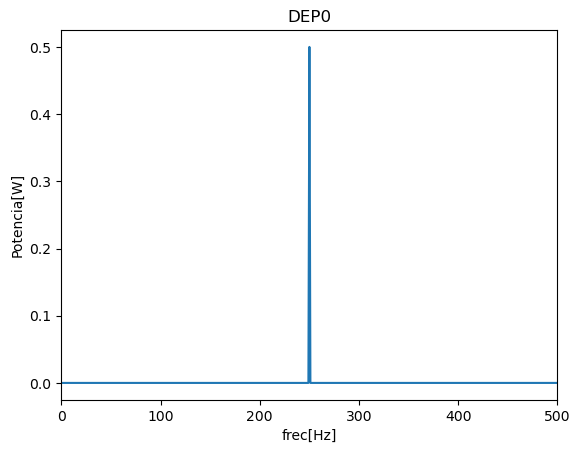

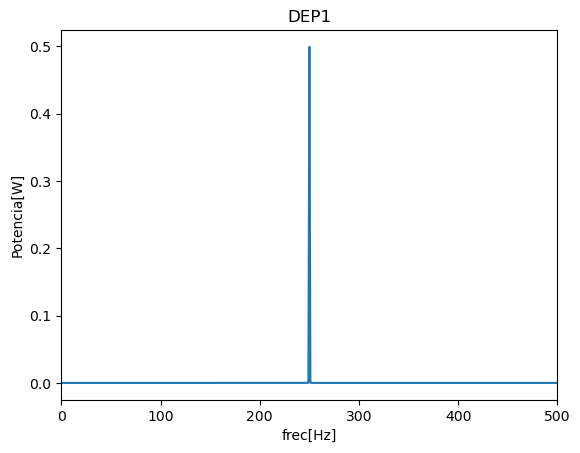

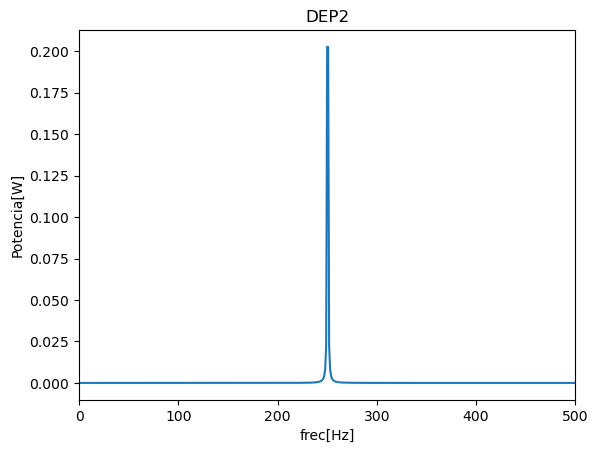

In [37]:
#%% Muestro las DEP o PSD power spectral density
plt.figure(1)

plt.plot(f, DEP0/(E0*N))
plt.title("DEP0")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(0, fs/2)

plt.figure(2)
plt.plot(f, DEP1/(E1*N))
plt.title("DEP1")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(0, fs/2)

plt.figure(3)

plt.plot(f, DEP2/(E2*N))
plt.title("DEP2")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(0, fs/2)


plt.show()

De los graficos anteriores no se puede apreciar casi nada vamos a hacer zoom en la proximidad de la señal

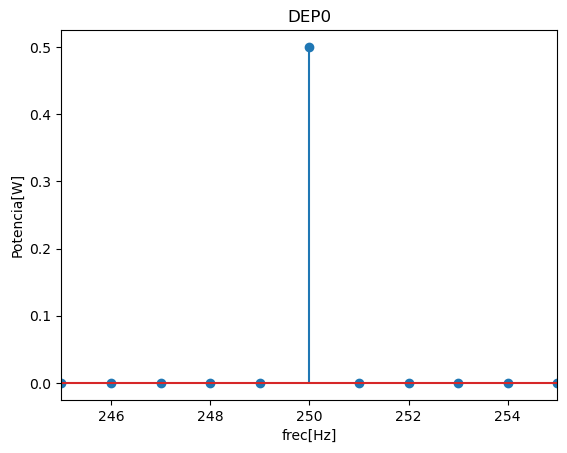

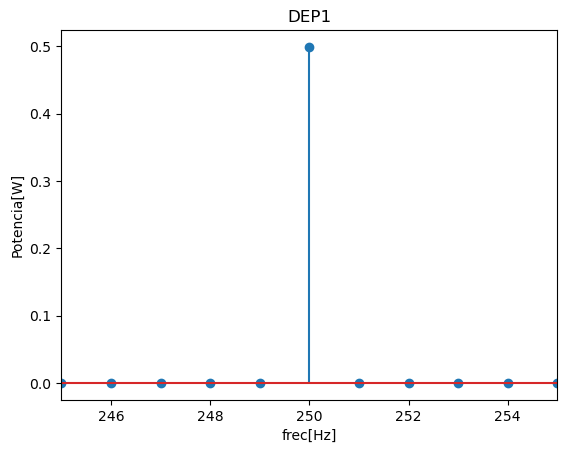

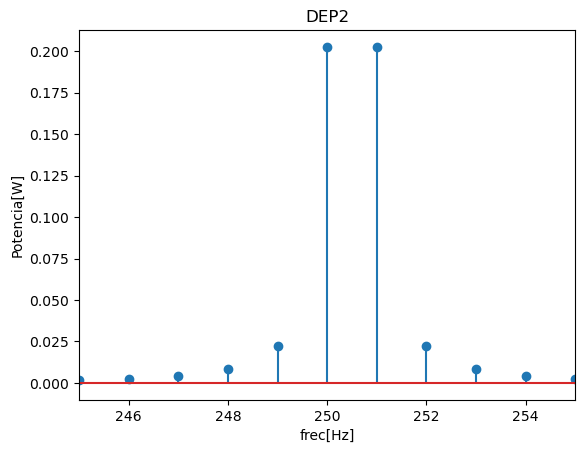

In [38]:
plt.figure(1)

plt.stem(f, DEP0/(E0*N))
plt.title("DEP0")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(245, 255)

plt.figure(2)
plt.stem(f, DEP1/(E1*N))
plt.title("DEP1")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(245, 255)

plt.figure(3)

plt.stem(f, DEP2/(E2*N))
plt.title("DEP2")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(245, 255)


plt.show()

Ahora si a partir de estos graficos de las PSD(power spectral density) es evidente que estos desfasajes que computamos en $\Delta f$ estan generando un desparramo de la potencia en otras frecuencias.<br>
Con respecto al punto B) ya se verifico que se conservo la potencia de las señales pero las misma no fueron generadas con potencia unitaria sino que se utilizo esa potencia para normalizar estos graficos. Por otra parte entiendo que estas diferencias en los graficos nacen a partir del hecho de que mi resolucion espectral no varia para las 3 señales, y por ende algunos graficos se ajustan mejor a esa resolucion y otros no.

In [39]:
#%%Armo los nuevos vectores f
N_prima=9*N
df_prima=fs/N_prima
f_prima=np.arange(0,fs,df_prima)

In [40]:
#%%Aplico el zero padding solicitado en el bonus
DEP0_prima=np.abs(fft(seno_cont0,n=N_prima))**2
DEP1_prima=np.abs(fft(seno_cont1,n=N_prima))**2
DEP2_prima=np.abs(fft(seno_cont2,n=N_prima))**2

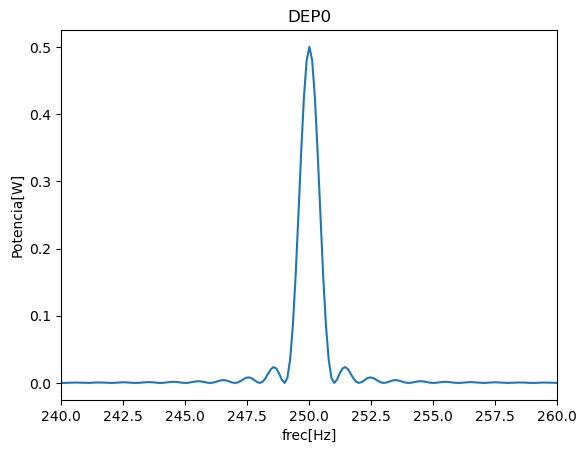

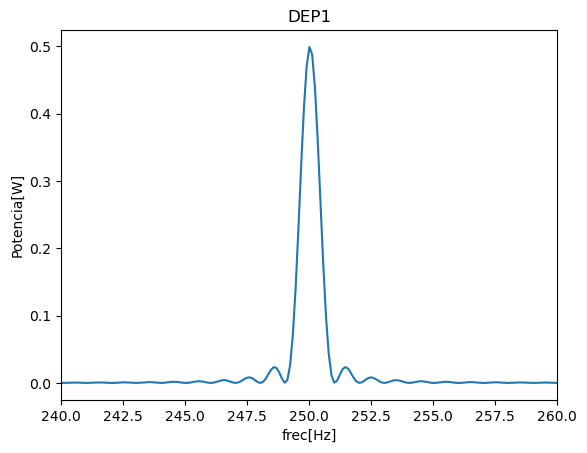

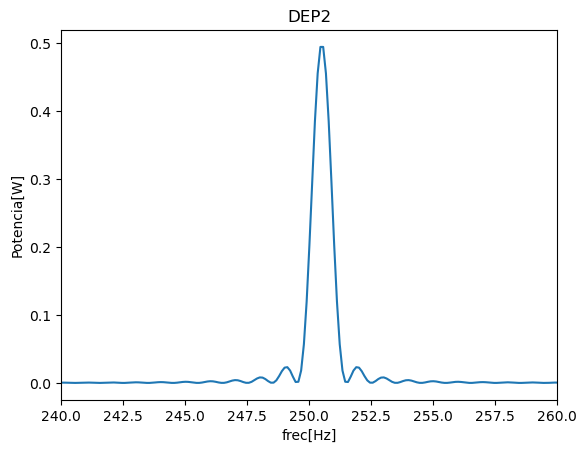

In [41]:
#%% Muestro las DEP o PSD power spectral density
plt.figure(1)

plt.plot(f_prima, DEP0_prima/(E0*N))
plt.title("DEP0")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(240, 260)

plt.figure(2)
plt.plot(f_prima, DEP1_prima/(E1*N))
plt.title("DEP1")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(240, 260)

plt.figure(3)

plt.plot(f_prima, DEP2_prima/(E2*N))
plt.title("DEP2")
plt.ylabel("Potencia[W]")
plt.xlabel("frec[Hz]")
plt.xlim(240, 260)

plt.show()

Es evidente que el zero padding soluciono casos como el de la DEP2 que ahora muestra mejor su altura(potencia), ya que se mejoro la resolucion espectral, sin embargo nos agrega un deparramo o leakage en DEP0 y DEP1 que antes no estaba.<br>
Valga la aclaracion, entiendo que DEP1 engancho tan bien porque es un multiplo de mi $\Delta f$.<br>
Me puedo equivocar jejejej.